In [1]:
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import itertools
import os
import pandas as pd

In [11]:
MISS_FAC = 10 # a multiple of actual missing for experiments
MISS_MAX = 0.7 # maximum allowed missing value
data_dir="/data/rmthomas/HeteroSmallSample"
df = pd.read_csv(os.path.join(data_dir, "real_data.csv"))
df = df[df.columns[25:125]] # these are features we used 

# percentage of missing data (nan) per feature
nan_ratio_per_feature = np.sum(np.isnan(df.values),axis=0)/df.values.shape[0]
nan_ratio_per_feature = np.array([min(x*MISS_FAC, MISS_MAX) for x in nan_ratio_per_feature])

# load the simulated data
df_full = pd.read_csv(os.path.join(data_dir, "simulated_data.csv"), index_col=0)
df_nan = df_full.copy()

# Set elements to missing (nan) with the same probability as the real data
N = df_full.shape[0]
for i, percent_missing in enumerate(nan_ratio_per_feature):
    df_nan.loc[np.random.random_sample((N)) < percent_missing, f'f{i}'] = np.nan
    



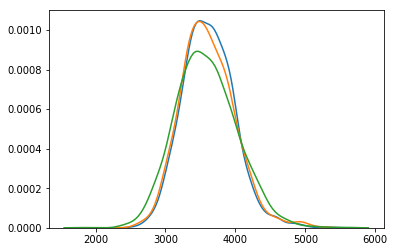

In [12]:
i=80
sns.kdeplot(df_full[f'f{i}'], legend=False)
sns.kdeplot(df_nan[f'f{i}'], legend=False)
sns.kdeplot(df[df.columns[i]], legend=False)


In [ ]:
id(df_full)